# Path planning

The goal is to find the shortest path connecting points $a$ and $b$ in $\mathbb{R}^d$ 
that avoids $m$ circles, centered at $p_j$ with radius $r_j$, $j = 1, \ldots, m$.

After discretizing the arc length parametrized path into points $x_0, \ldots, x_n$, the 
problem is posed as

$$
\begin{array}{ll}
\text{minimize}   & L \\
\text{subject to} & x_0 = a, \quad x_n = b, \\
                  & \|x_i - x_{i-1}\|_2 \leq L/n, \quad i = 1, \ldots, n, \\
                  & \|x_i - p_j\|_2 \geq r_j, \quad i = 1, \ldots, n, \; j = 1, \ldots, 
                  m,
\end{array}
$$

where $L$ and $x_i$ are variables, and $a, b, p_j$, and $r_j$ are given.


In [ ]:
import cvxpy as cp
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np

from dccp import is_dccp

n = 50
l = 10
m = 5
a = np.array([0, 0]).T
b = np.array([l, l]).T
d = 2
p = np.array([[2, 4.5, 6, 7, 8.5], [2.2, 5, 8, 6, 9]])
r = [1, 0.8, 0.4, 1.4, 0.5]

x = []
for i in range(n + 1):
    x += [cp.Variable((d, 1))]
L = cp.Variable(1)
constr = [x[0] == a, x[n] == b]
cost = L
for i in range(n):
    constr += [cp.norm(x[i] - x[i + 1]) <= L / n]
    for j in range(m):
        p_j = p[:, j:j+1]  # Keep 2D shape by using slice notation
        constr += [cp.norm(x[i] - p_j) >= r[j]]

prob = cp.Problem(cp.Minimize(cost), constr)
assert is_dccp(prob)
result = prob.solve(method="dccp")
assert prob.status == cp.OPTIMAL, "DCCP failed to find optimal solution"
assert result is not None, "DCCP failed to find a solution"

Problem is DCCP: True


## Visualization of the trajectory

To visually validate the solution we plot the optimal trajectory and ensure
it avoids the circular obstacles.

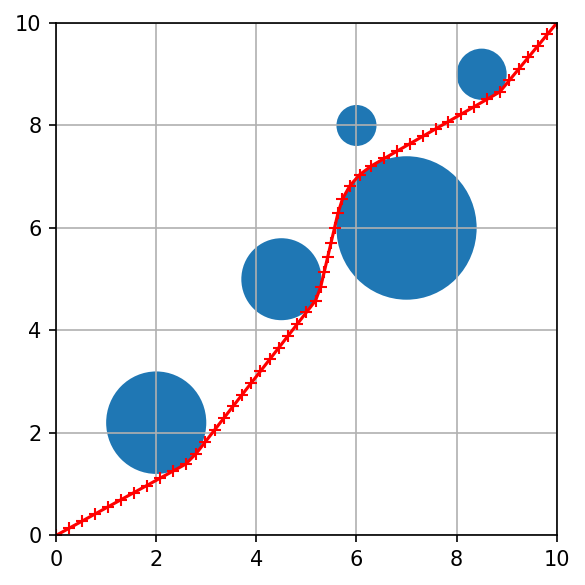

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
for i in range(m):
    center = tuple(p[:, i])
    circle = mpatches.Circle(center, r[i], ec="none")
    ax.add_patch(circle)
ax1 = [xx.value[0] for xx in x]
ax2 = [xx.value[1] for xx in x]
plt.plot(ax1, ax2, "r-+")
plt.ylim(0, 10)
plt.xlim(0, 10)
ax.grid()
fig.set_dpi(150)
fig.tight_layout()